# Plotting standardized scoring

I have been investigating reviewing things, and as such it is interesting to see a visualization of a normal distribution and corresponding metrics such as z-score, T-score and cumulative percentage.

As such I thought I would cobble together some figures, to use in the blog post. I was also thinking that it would be good to practice multi axis figures. I found them hard before, but done right can really help visualize what is going on.

As always lets start with downloading the libraries.

In [139]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import numpy as np
import scipy.stats as stats

Lets see the normal distribution first, along with the cumulative distribution. Lastly we want to add the T-score. This T-score is a standardized score ($T$). Its a easily calculated from the standard deviation ($ \sigma $):

$$ T = 50 + 10\sigma $$

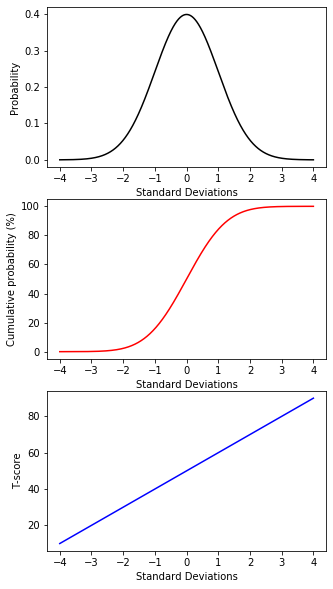

In [153]:
# get x points between -4 and 4 with .001 steps. and between -3 and 3 for the stddev range
x = np.arange(-4, 4, 0.001)

# get y points as normal distribution, with mean = 0, std.dev. = 1.
y_norm = stats.norm.pdf(x,0,1)

# get the y points for a cumulative distribution
y_cum = 100*stats.norm.cdf(x,0,1)

# get the T-score values
y_Tscore = 50 + 10*x 

# intialize the figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5,10))

# plot the normal and cumulative distribution
ax1.plot(x, y_norm, 'black')
ax2.plot(x, y_cum, 'red')
ax3.plot(x, y_Tscore, 'blue')

# set the text for the axes
ax1.set_xlabel('Standard Deviations')
ax1.set_ylabel('Probability')
ax2.set_xlabel('Standard Deviations')
ax2.set_ylabel('Cumulative probability (%)')
ax3.set_xlabel('Standard Deviations')
ax3.set_ylabel('T-score')
plt.show()

So what we really want to do is combine the information of the second and third graph on to the first graph. I.e we are interested in the cumulative probabilities (y-axis of graph 2 and 3) at each standard deviations (shown in graph 1). Lets get a sense of the values. In the table we construct below, sigma is the x axis, and y axis is the probability. The other two columns we want to map on to the x axis.

In [160]:
print("sigma","\t", "prob (y)","\t", "cum%","\t", "Tscore")
for i in np.arange(-4,5,1):
    print(i, "\t",
          np.round(stats.norm.pdf(i,0,1),5), "\t",
          np.round(100*stats.norm.cdf(i,0,1),1), "\t",
          np.round(50+10*i,1))

sigma 	 prob (y) 	 cum% 	 Tscore
-4 	 0.00013 	 0.0 	 10
-3 	 0.00443 	 0.1 	 20
-2 	 0.05399 	 2.3 	 30
-1 	 0.24197 	 15.9 	 40
0 	 0.39894 	 50.0 	 50
1 	 0.24197 	 84.1 	 60
2 	 0.05399 	 97.7 	 70
3 	 0.00443 	 99.9 	 80
4 	 0.00013 	 100.0 	 90


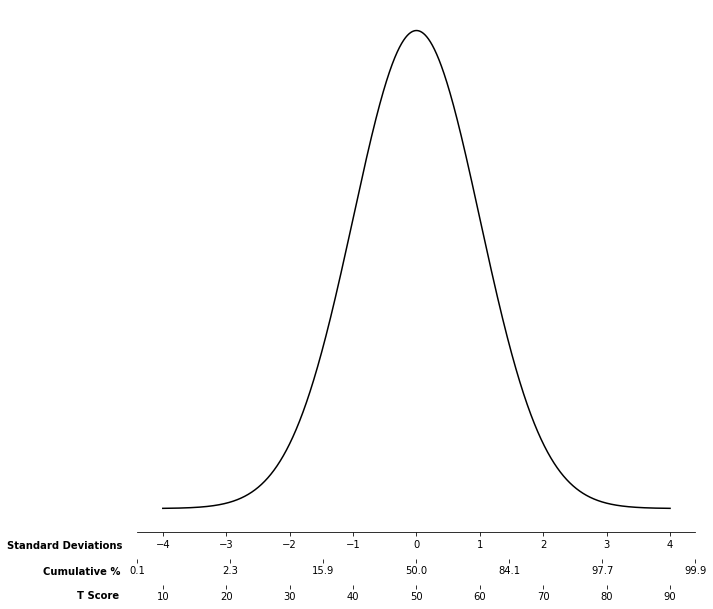

In [239]:
# get x points between -4 and 4 with .001 steps. and between -3 and 3 for the stddev range
x = np.arange(-4, 4, 0.001)
x_std = np.arange(-3,4,1)

# get y points as normal distribution, with mean = 0, std.dev. = 1.
y = stats.norm.pdf(x,0,1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

# plot the normal distribution
ax.plot(x, y, 'black')

# remove the stuff we don't need
ax.tick_params(left=False, right=False, bottom=False, top=False, labelleft=False, labelbottom=True)
for sp in ax.spines.values():
    sp.set_visible(False)

ax.spines["bottom"].set_visible(True)
    
# get label for standard deviations set 
ax.set_xlabel('Standard Deviations', weight='bold')
ax.xaxis.set_label_coords(-0.13, -0.015)

# make room on bottom
plt.subplots_adjust(bottom=0.15)


# create a second axes for the cumulative score
axC = ax.twiny()

# move second axis down
axC.spines["bottom"].set_position(("axes", -.05))
x_cum_lab = np.arange(-3, 4, 1)
y_cum_lab = np.round(100*stats.norm.cdf(x_cum_lab,0,1), 1)
y_cum_norm = stats.norm.pdf(x_cum_lab,0,1)

axC.set_xticklabels(y_cum_lab)
axC.plot(x_cum_lab, y_cum_norm, 'black', alpha=0)
axC.set_xlim(-3,3)
# override the default behavior for a twiny axis
axC.set_frame_on(True)
axC.patch.set_visible(False)
for sp in axC.spines.values():
    sp.set_visible(False)

axC.xaxis.set_ticks_position("bottom")
axC.xaxis.set_label_position("bottom")
axC.spines["bottom"].set_visible(False)

axC.set_xlabel("Cumulative %", weight='bold')
axC.xaxis.set_label_coords(-0.10, -0.065)



# create a third axes for the T score
axT = ax.twiny()

# move third axis down
axT.spines["bottom"].set_position(("axes", -.1))

#
yT = norm.pdf(x_std,0,1) 
xT = np.round(norm.cdf(x_std,0,1)*100,1)
axT.plot(y_Tscore, y_norm, 'black', alpha=0)

# override the default behavior for a twiny axis
axT.set_frame_on(False)
axT.patch.set_visible(False)
for sp in axT.spines.values():
    sp.set_visible(False)

axT.xaxis.set_ticks_position("bottom")
axT.xaxis.set_label_position("bottom")
axT.spines["bottom"].set_visible(True)

axT.set_xlabel("T Score", weight='bold')
axT.xaxis.set_label_coords(-0.07, -0.11)


plt.show()